## DEEP LEARNING SECTION - PREDICTING MOVIE GENRES FROM POSTERS

In [1]:
import numpy                  as np
import pandas                 as pd
import scipy                  as sp
import sklearn.neighbors      as knn
import matplotlib
import matplotlib.pyplot      as plt
import seaborn
import requests
import urllib
import joblib
import requests
import json
import os
import random
import seaborn as sns
#import statsmodels.api as sm
from matplotlib                           import rcParams
from sklearn                              import discriminant_analysis
from sklearn.decomposition                import PCA
from sklearn                              import preprocessing
from sklearn.linear_model                 import LogisticRegression as LogReg
from sklearn.discriminant_analysis        import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis        import QuadraticDiscriminantAnalysis as QDA
from scipy.stats                          import mode
from sklearn                              import linear_model
from IPython.core.interactiveshell        import InteractiveShell
from time                                 import sleep
from collections                          import Counter
from itertools                            import combinations, permutations

%matplotlib inline

## Data clearning and visualization 

In [2]:
#importing dataset and clean missing values and duplicates

import pandas as pd
df = pd.read_csv('MovieGenre.csv', encoding="ISO-8859-1", usecols=["imdbId", "Title", "Genre", "Poster"])
df.set_index(["imdbId"], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(subset="Poster", keep=False, inplace=True)
df  

,Title,Genre,Poster
imdbId,,,
114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...
...,...,...,...
83291,Los violadores (1981),Action|Thriller,https://images-na.ssl-images-amazon.com/images...
83168,Tanya's Island (1980),Drama,https://images-na.ssl-images-amazon.com/images...
82875,Pacific Banana (1981),Comedy,https://images-na.ssl-images-amazon.com/images...


In [3]:
# extract movie's year information as a separate column 

import re

re_year = re.compile("\((\d{4})\)")
df["year"] = df.Title.map(lambda x: int(re_year.findall(x)[0]) if re_year.findall(x) else None)
df

,Title,Genre,Poster,year
imdbId,,,,
114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,1995.0
113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,1995.0
113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0
114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0
113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0
...,...,...,...,...
83291,Los violadores (1981),Action|Thriller,https://images-na.ssl-images-amazon.com/images...,1981.0
83168,Tanya's Island (1980),Drama,https://images-na.ssl-images-amazon.com/images...,1980.0
82875,Pacific Banana (1981),Comedy,https://images-na.ssl-images-amazon.com/images...,1981.0


In [6]:
#separate genre types to multiple columns
df.columns
df[['maingenre','genre2','genre3']] = df.Genre.str.split("|",expand=True,)
df=df.head(10000)
df

/Users/krystal/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Title,Genre,Poster,year,maingenre,genre2,genre3
imdbId,,,,,,,
114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,1995.0,Animation,Adventure,Comedy
113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,1995.0,Action,Adventure,Family
113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Romance,None
114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Drama,Romance
113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Family,Romance
...,...,...,...,...,...,...,...
36260,Phantom Lady (1944),Crime|Drama|Film-Noir,https://images-na.ssl-images-amazon.com/images...,1944.0,Crime,Drama,Film-Noir
41088,Act of Violence (1949),Drama|Film-Noir|Thriller,https://images-na.ssl-images-amazon.com/images...,1949.0,Drama,Film-Noir,Thriller
93258,Yan zhi kou (1987),Drama|Fantasy|Music,https://images-na.ssl-images-amazon.com/images...,1987.0,Drama,Fantasy,Music


In [7]:
df.count

<bound method DataFrame.count of                                      Title                       Genre  \
imdbId                                                                   
114709                    Toy Story (1995)  Animation|Adventure|Comedy   
113497                      Jumanji (1995)     Action|Adventure|Family   
113228             Grumpier Old Men (1995)              Comedy|Romance   
114885            Waiting to Exhale (1995)        Comedy|Drama|Romance   
113041  Father of the Bride Part II (1995)       Comedy|Family|Romance   
...                                    ...                         ...   
36260                  Phantom Lady (1944)       Crime|Drama|Film-Noir   
41088               Act of Violence (1949)    Drama|Film-Noir|Thriller   
93258                   Yan zhi kou (1987)         Drama|Fantasy|Music   
43809              Miracle in Milan (1951)        Comedy|Drama|Fantasy   
384369              Before the Fall (2004)             Drama|Sport|War   

    

In [8]:
#count values for each genre
genre_df=df['maingenre'].value_counts()
genre_df

Comedy         2960
Drama          2418
Action         1379
Crime           768
Adventure       582
Horror          436
Biography       384
Documentary     383
Animation       251
Fantasy          88
Family           52
Western          50
Mystery          50
Thriller         48
Romance          47
Sci-Fi           47
Musical          20
Short            15
War              13
Film-Noir         5
Music             4
Name: maingenre, dtype: int64

In [9]:
#put genre value counts in dataframe
genre_count = pd.DataFrame(genre_df).reset_index()
genre_count

,index,maingenre
0,Comedy,2960
1,Drama,2418
2,Action,1379
3,Crime,768
4,Adventure,582
5,Horror,436
6,Biography,384
7,Documentary,383
8,Animation,251
9,Fantasy,88


In [10]:
#rename genre and counts for plotting
genre_count.columns = ['genre','count']
genre_count

,genre,count
0,Comedy,2960
1,Drama,2418
2,Action,1379
3,Crime,768
4,Adventure,582
5,Horror,436
6,Biography,384
7,Documentary,383
8,Animation,251
9,Fantasy,88


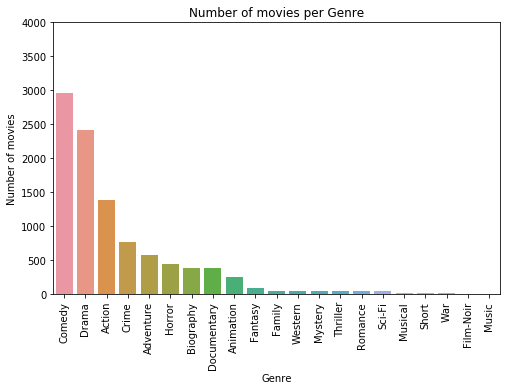

In [55]:
#plotting 
genre_count.sort_values(by="count", ascending=False, inplace=True)

plt.subplots(figsize=(8,5));
sns.barplot(x="genre", y="count", data=genre_count);
plt.xticks(rotation="vertical");
plt.xlabel("Genre");
plt.ylabel("Number of movies");
plt.title("Number of movies per Genre");
plt.ylim((0,4000));

## Deep learning data pre-processing

In [13]:
#Imports
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df.shape

(10000, 7)

In [15]:
df.columns

Index(['Title', 'Genre', 'Poster', 'year', 'maingenre', 'genre2', 'genre3'], dtype='object')

In [16]:
df2 = df.reset_index()
df2

,imdbId,Title,Genre,Poster,year,maingenre,genre2,genre3
0,114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,1995.0,Animation,Adventure,Comedy
1,113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,1995.0,Action,Adventure,Family
2,113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Romance,None
3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Drama,Romance
4,113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Family,Romance
...,...,...,...,...,...,...,...,...
9995,36260,Phantom Lady (1944),Crime|Drama|Film-Noir,https://images-na.ssl-images-amazon.com/images...,1944.0,Crime,Drama,Film-Noir
9996,41088,Act of Violence (1949),Drama|Film-Noir|Thriller,https://images-na.ssl-images-amazon.com/images...,1949.0,Drama,Film-Noir,Thriller
9997,93258,Yan zhi kou (1987),Drama|Fantasy|Music,https://images-na.ssl-images-amazon.com/images...,1987.0,Drama,Fantasy,Music
9998,43809,Miracle in Milan (1951),Comedy|Drama|Fantasy,https://images-na.ssl-images-amazon.com/images...,1951.0,Comedy,Drama,Fantasy


In [17]:
df2.shape

(10000, 8)

In [18]:
df2.columns

Index(['imdbId', 'Title', 'Genre', 'Poster', 'year', 'maingenre', 'genre2',
       'genre3'],
      dtype='object')

In [19]:
df2['imdbId'] = df2['imdbId'].astype(str)

In [20]:
df2.info

<bound method DataFrame.info of       imdbId                               Title                       Genre  \
0     114709                    Toy Story (1995)  Animation|Adventure|Comedy   
1     113497                      Jumanji (1995)     Action|Adventure|Family   
2     113228             Grumpier Old Men (1995)              Comedy|Romance   
3     114885            Waiting to Exhale (1995)        Comedy|Drama|Romance   
4     113041  Father of the Bride Part II (1995)       Comedy|Family|Romance   
...      ...                                 ...                         ...   
9995   36260                 Phantom Lady (1944)       Crime|Drama|Film-Noir   
9996   41088              Act of Violence (1949)    Drama|Film-Noir|Thriller   
9997   93258                  Yan zhi kou (1987)         Drama|Fantasy|Music   
9998   43809             Miracle in Milan (1951)        Comedy|Drama|Fantasy   
9999  384369              Before the Fall (2004)             Drama|Sport|War   

       

In [21]:
#IMAGE PROCESSING CODE STARTS HERE

import os
from sklearn.model_selection import train_test_split

import urllib.request
from urllib.error import HTTPError

from PIL import Image

In [22]:
na_rows = df2[df2.Genre.str.contains('N/A') == True].index
df2 = df2.drop(na_rows, axis=0)

In [23]:

# Select the top 10000 rows of the Dataframe for 2 columns only
df2

,imdbId,Title,Genre,Poster,year,maingenre,genre2,genre3
0,114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,1995.0,Animation,Adventure,Comedy
1,113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,1995.0,Action,Adventure,Family
2,113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Romance,None
3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Drama,Romance
4,113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Family,Romance
...,...,...,...,...,...,...,...,...
9995,36260,Phantom Lady (1944),Crime|Drama|Film-Noir,https://images-na.ssl-images-amazon.com/images...,1944.0,Crime,Drama,Film-Noir
9996,41088,Act of Violence (1949),Drama|Film-Noir|Thriller,https://images-na.ssl-images-amazon.com/images...,1949.0,Drama,Film-Noir,Thriller
9997,93258,Yan zhi kou (1987),Drama|Fantasy|Music,https://images-na.ssl-images-amazon.com/images...,1987.0,Drama,Fantasy,Music
9998,43809,Miracle in Milan (1951),Comedy|Drama|Fantasy,https://images-na.ssl-images-amazon.com/images...,1951.0,Comedy,Drama,Fantasy


### Prepare X

In [24]:
# Transform images to arrays 
from tqdm import tqdm

img_width = 300
img_height = 350

X = []

for i in tqdm(range(df2.shape[0])):
      path = 'posters/' + df2['imdbId'][i] + '.jpg'
      img = image.load_img(path, target_size=(img_width, img_height, 3))
      img = image.img_to_array(img)
      img = img/255.0
      X.append(img)

X = np.array(X)

100%|██████████| 10000/10000 [00:34<00:00, 286.52it/s]


X.shape

GENRE Action|Crime|Sci-Fi


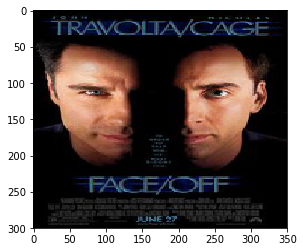

In [25]:
plt.imshow(X[1500])
print('GENRE',df2['Genre'][1500])

### Prepare Y

In [26]:
def string_to_vector(data, val_name):
    
    from sklearn.feature_extraction.text import CountVectorizer
    
    # convert any np.nan to a string 'nan'
    data[val_name][pd.isnull(data[val_name])] = 'nan'
    
    vectorizer = CountVectorizer(analyzer = "word",   
                                             tokenizer = None,    
                                             preprocessor = None, 
                                             stop_words = None,   
                                             max_features = 50000)

    val_data = vectorizer.fit_transform(data[val_name])
    df_val = pd.DataFrame(val_data.toarray())
    df_val.columns = vectorizer.get_feature_names()
    df_val.index = data.index
    
    return df_val

In [27]:
import pandas as pd
df_genres = string_to_vector(df2, "Genre")
df_genres.head(10000)

/Users/krystal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,...,noir,romance,sci,short,show,sport,talk,thriller,war,western
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
9997,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_new = pd.concat([df2,df_genres], axis=1)
df_new.head()

,imdbId,Title,Genre,Poster,year,maingenre,genre2,genre3,action,adventure,...,noir,romance,sci,short,show,sport,talk,thriller,war,western
0,114709,Toy Story (1995),Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,1995.0,Animation,Adventure,Comedy,0,1,...,0,0,0,0,0,0,0,0,0,0
1,113497,Jumanji (1995),Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,1995.0,Action,Adventure,Family,1,1,...,0,0,0,0,0,0,0,0,0,0
2,113228,Grumpier Old Men (1995),Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Romance,None,0,0,...,0,1,0,0,0,0,0,0,0,0
3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Drama,Romance,0,0,...,0,1,0,0,0,0,0,0,0,0
4,113041,Father of the Bride Part II (1995),Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...,1995.0,Comedy,Family,Romance,0,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
df_new2 = df_new.drop(['imdbId','Title', 'Poster','year','maingenre','genre2','genre3'], axis = 1)
df_new2

,Genre,action,adventure,animation,biography,comedy,crime,documentary,drama,family,...,noir,romance,sci,short,show,sport,talk,thriller,war,western
0,Animation|Adventure|Comedy,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Action|Adventure|Family,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Comedy|Romance,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Comedy|Drama|Romance,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,Comedy|Family|Romance,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Crime|Drama|Film-Noir,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
9996,Drama|Film-Noir|Thriller,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
9997,Drama|Fantasy|Music,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9998,Comedy|Drama|Fantasy,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y = df_new2.drop(['Genre'],axis=1)
y

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,...,noir,romance,sci,short,show,sport,talk,thriller,war,western
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
9997,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
y = y.to_numpy()
y.shape

(10000, 27)

In [32]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [33]:
# image shape
X_train[0].shape

(300, 350, 3)

In [34]:
# genre shape
y_train[0].shape

(27,)

In [35]:
y

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

## Deep learning module

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

Using TensorFlow backend.


In [37]:
#full model
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape =(300,350,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(27, activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 348, 16)      448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 298, 348, 16)      64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 174, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 149, 174, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 172, 32)      4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 147, 172, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 86, 32)       

In [39]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 2741s 343ms/step - loss: 0.6139 - accuracy: 0.7005 - val_loss: 0.2611 - val_accuracy: 0.9141
Epoch 2/5
8000/8000 [==============================] - 2746s 343ms/step - loss: 0.2717 - accuracy: 0.9069 - val_loss: 0.2710 - val_accuracy: 0.9141
Epoch 3/5
8000/8000 [==============================] - 2881s 360ms/step - loss: 0.2498 - accuracy: 0.9116 - val_loss: 0.2580 - val_accuracy: 0.9141
Epoch 4/5
8000/8000 [==============================] - 2118s 265ms/step - loss: 0.2430 - accuracy: 0.9133 - val_loss: 0.2445 - val_accuracy: 0.9141
Epoch 5/5
8000/8000 [==============================] - 1886s 236ms/step - loss: 0.2386 - accuracy: 0.9150 - val_loss: 0.2519 - val_accuracy: 0.9141


In [41]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'TEST'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'TEST'], loc='upper left')
  plt.show()

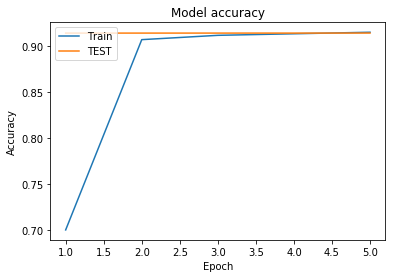

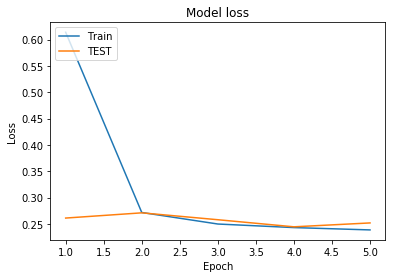

In [42]:
plot_learningCurve(history, 5)

## Poster prediction

['action' 'adventure' 'animation' 'biography' 'comedy' 'crime'
 'documentary' 'drama' 'family' 'fantasy' 'fi' 'film' 'history' 'horror'
 'music' 'musical' 'mystery' 'noir' 'romance' 'sci' 'short' 'show' 'sport'
 'talk' 'thriller' 'war' 'western']
drama (0.782)
romance (0.238)
comedy (0.237)
crime (0.0744)
thriller (0.0539)


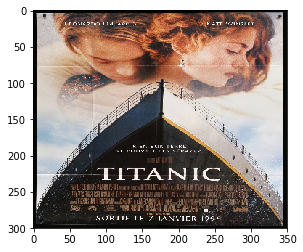

In [64]:
# successful case 
img = image.load_img('predict/test2.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = np.array(df_new2.columns[1:])
print(classes)
y_prob = model.predict(img)
top5 = np.argsort(y_prob[0])[:-6:-1]

for i in range(5):
 print('{}'.format(classes[top5[i]])+' ({:.3})'.format(y_prob[0][top5[i]]))

['action' 'adventure' 'animation' 'biography' 'comedy' 'crime'
 'documentary' 'drama' 'family' 'fantasy' 'fi' 'film' 'history' 'horror'
 'music' 'musical' 'mystery' 'noir' 'romance' 'sci' 'short' 'show' 'sport'
 'talk' 'thriller' 'war' 'western']
drama (0.634)
horror (0.237)
crime (0.171)
thriller (0.168)
action (0.15)


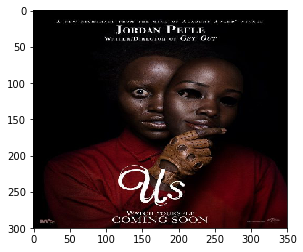

In [48]:
# successful case 
img = image.load_img('predict/test7.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = np.array(df_new2.columns[1:])
print(classes)
y_prob = model.predict(img)
top5 = np.argsort(y_prob[0])[:-6:-1]

for i in range(5):
 print('{}'.format(classes[top5[i]])+' ({:.3})'.format(y_prob[0][top5[i]]))

['action' 'adventure' 'animation' 'biography' 'comedy' 'crime'
 'documentary' 'drama' 'family' 'fantasy' 'fi' 'film' 'history' 'horror'
 'music' 'musical' 'mystery' 'noir' 'romance' 'sci' 'short' 'show' 'sport'
 'talk' 'thriller' 'war' 'western']
drama (0.657)
horror (0.198)
crime (0.171)
thriller (0.149)
romance (0.128)


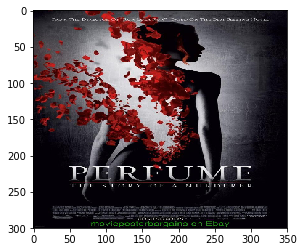

In [85]:
#semi successful case
img = image.load_img('predict/test11.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = np.array(df_new2.columns[1:])
print(classes)
y_prob = model.predict(img)
top5 = np.argsort(y_prob[0])[:-6:-1]

for i in range(5):
 print('{}'.format(classes[top5[i]])+' ({:.3})'.format(y_prob[0][top5[i]]))

['action' 'adventure' 'animation' 'biography' 'comedy' 'crime'
 'documentary' 'drama' 'family' 'fantasy' 'fi' 'film' 'history' 'horror'
 'music' 'musical' 'mystery' 'noir' 'romance' 'sci' 'short' 'show' 'sport'
 'talk' 'thriller' 'war' 'western']
drama (0.756)
comedy (0.385)
romance (0.303)
crime (0.0806)
adventure (0.0499)


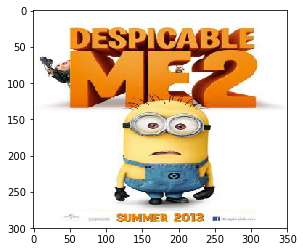

In [114]:
# case that failed
img = image.load_img('predict/test17.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = np.array(df_new2.columns[1:])
print(classes)
y_prob = model.predict(img)
top5 = np.argsort(y_prob[0])[:-6:-1]

for i in range(5):
 print('{}'.format(classes[top5[i]])+' ({:.3})'.format(y_prob[0][top5[i]]))

#### Final thots: the predictions can largely depend on the genre distribution and the movie years in the training dataset